 ### DL RNN
 
 # Analyzing Social Media Comment Sentiment with Recurrent Neural Networks in Python
 

In [1]:
import os
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize # splits sentences into word 
from nltk.corpus import stopwords,opinion_lexicon
from nltk.stem.snowball import SnowballStemmer  
from nltk.stem import WordNetLemmatizer


In [2]:
#os.getcwd()
#print(os.listdir(os.getcwd()))
os.chdir("C:\\Users\\ingri\\OneDrive\\SynergisticPython\\text sentiment")

In [4]:
#nltk.download('omw-1.4')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('opinion_lexicon')

In [5]:
data = pd.read_excel('Depression _ Anxiety Facebook page Comments Text.xlsx')
data.head()

,Comments Text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...


### Data Cleaning

In [6]:
data['Comments Text'][0]

'So, when you ask what the two illnesses are...they\'re similar in that they tend to have moodiness involved, impulsivity and self-damaging behaviors for compensatory measures. Otherwise, they\'re not really that similar, but they do seem to "like" one another and often show up in the same person...making their lives chaotic, difficult, dysfunctional, and intense. \n\nSo, if your friend is concerned that they may have one (or both) of these illnesses, they should not be ashamed. It\'s definitely not their fault. They should, instead, get help from a professional...and INSIST that they are treated appropriately with the correct types of therapy and medication.'

In [7]:
 #re.sub("[^A-z" "]+"," ",data["Comments Text"][0])

In [8]:
#data['Comments Text']=data["Comments Text"].apply(Lambda x:re.sub("[^A-z" "]+"," ",x))

In [9]:
stopword=stopwords.words('english')

In [10]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
lem=WordNetLemmatizer()

In [12]:
len(stopword)

179

In [13]:
def remove(x):
    x=re.sub("[^A-z" "]+"," ",x )     # uses the re (regular expression) module to replace                                       
    s=""                               # any non-alphabetic characters (including spaces) with a single space
    
    for i in x.split():    #splits the string into a list of words based on spaces.
        if i not in stopword:
            i=lem.lemmatize(word=i)
            s=s+" "+i
    return s

In [14]:
data["Comments_clean"]=data["Comments Text"].apply(remove)
data.head()

,Comments Text,Comments_clean
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...


In [15]:
data["Comments_clean"][0]

' So ask two illness similar tend moodiness involved impulsivity self damaging behavior compensatory measure Otherwise really similar seem like one another often show person making life chaotic difficult dysfunctional intense So friend concerned may one illness ashamed It definitely fault They instead get help professional INSIST treated appropriately correct type therapy medication'

In [16]:
data.shape

(7145, 2)

In [17]:
#pip install vaderSentiment

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
vs=SentimentIntensityAnalyzer()

In [20]:
vs.emojis['😁']

'beaming face with smiling eyes'

In [21]:
vs.polarity_scores(data["Comments_clean"][3])

{'neg': 0.309, 'neu': 0.586, 'pos': 0.105, 'compound': -0.9905}

In [22]:
#d=vs.polarity_scores(data['Comments_clean'][3])
#d.pop('compound')
#d

In [23]:
#sorted(d.items(),key=lambda x:x[1],reverse=True)


In [24]:
##sorted(d.items(),key=lambda x:x[1],reverse=True)[0][0]


In [25]:
#sorted(vs.polarity_scores(data['Comments_clean'][0]),reverse=True)

In [26]:
def polarity(sent):
    d=vs.polarity_scores(sent)
    #d.pop('compound')
    #val=sorted(d.items(),key=lambda x:x[1],reverse=True)[0][0]
    if d['compound']>0.05:
        return "positive"
    elif d['compound']<-0.05:
        return 'negative'
    elif -0.05<=d['compound']<=0.05:
        return 'neutral'
    else:
        return 'Check'
    
    #return val

In [27]:
data['Target']=data['Comments_clean'].apply(polarity)
data.head()

,Comments Text,Comments_clean,Target
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...,negative
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...,negative
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...,negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...,negative
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...,negative


In [28]:
data.Target.value_counts()

negative    4038
positive    2925
neutral      182
Name: Target, dtype: int64

<Axes: >

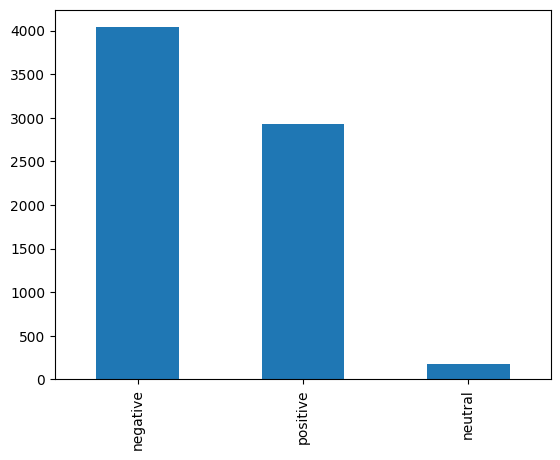

In [29]:
data.Target.value_counts().plot(kind='bar')

In [30]:
#!pip uninstall seaborn
#!pip install seaborn

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Comments Text   7145 non-null   object
 1   Comments_clean  7145 non-null   object
 2   Target          7145 non-null   object
dtypes: object(3)
memory usage: 167.6+ KB


In [32]:
#sns.countplot(data.Target)

<Axes: >

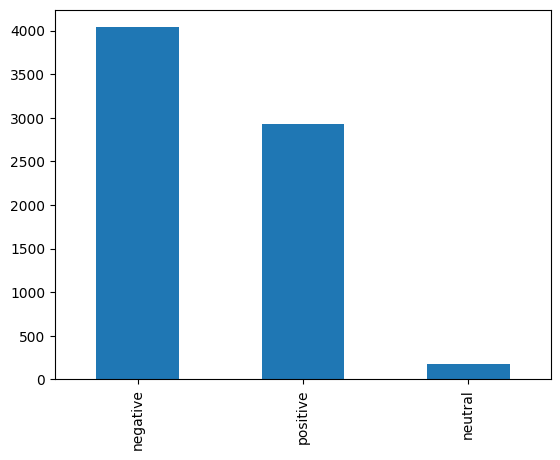

In [33]:
data.Target.value_counts().plot(kind='bar')

In [34]:
#data.to_csv("New_7k_clean_data.csv",index=False)

## Machine Learning

In [35]:
data_new=pd.read_csv('New_7k_clean_data.csv')
data_new.head()

,Comments Text,Comments_clean,Target
0,"So, when you ask what the two illnesses are......",So ask two illness similar tend moodiness inv...,negative
1,"In addition, people with BPD quite often have ...",In addition people BPD quite often weak self ...,negative
2,"Borderline Personality Disorder, like all othe...",Borderline Personality Disorder like personal...,negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,LONG ANSWER Bipolar disease caused chemical i...,negative
4,Well think of bipolar as a rollar coaster you ...,Well think bipolar rollar coaster high low pe...,negative


In [36]:
#sns.countplot(data_new.Target)

In [37]:
data_new.drop(columns='Comments Text', inplace=True)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer  # vector made from word counts. Convert data for machine learning


In [39]:
cv=CountVectorizer(lowercase=True)      #,stop_words=True --- returns boolean expression

In [40]:
data_array=cv.fit_transform(data_new.Comments_clean).toarray()
data_array.shape

(7145, 13211)

In [41]:
data_array[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
import numpy as np

In [43]:
np.unique(data_array[0])

array([0, 1, 2], dtype=int64)

In [44]:
for i in range(10):     # will count max unique for RNN
    print(np.unique(data_array[i]))

[0 1 2]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8 11]
[0 1 2 3 4]
[0 1 2]
[0 1]
[0 1 2 4]
[0 1]
[0 1 2 3 4 5]
[0 1 2 3]


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [46]:
x,x_test,y, y_test=train_test_split(data_array,data_new.Target,random_state=42,test_size=0.1)

In [47]:
x.shape

(6430, 13211)

In [48]:
x_test.shape

(715, 13211)

In [49]:
rf=RandomForestClassifier()

In [50]:
rf.fit(x,y)    #takes time ~2 minutes

RandomForestClassifier()

In [51]:
pred=rf.predict(x_test)

In [52]:
accuracy_score(y_test,pred)*100

76.08391608391608

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.78      0.84      0.81       407
     neutral       0.50      0.10      0.16        21
    positive       0.73      0.70      0.72       287

    accuracy                           0.76       715
   macro avg       0.67      0.54      0.56       715
weighted avg       0.75      0.76      0.75       715



In [54]:
confusion_matrix(y_test,pred)

array([[341,   1,  65],
       [ 11,   2,   8],
       [ 85,   1, 201]], dtype=int64)

# RNN

In [55]:
# tokenization
data_new.head()

,Comments_clean,Target
0,So ask two illness similar tend moodiness inv...,negative
1,In addition people BPD quite often weak self ...,negative
2,Borderline Personality Disorder like personal...,negative
3,LONG ANSWER Bipolar disease caused chemical i...,negative
4,Well think bipolar rollar coaster high low pe...,negative


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers

Tokenizer will use only three most common words at the same time. It will keep the counter of all words - even when it'sobvious that it will not use it later.

In [57]:
word_list=[]
max_len=0
for sent in data_new.Comments_clean:
    word_list.extend(sent.split())
    if max_len<len(sent):
        max_len=len(sent)
        
print(len(word_list))
word_set=set(word_list)
print("word_set=",len(word_set))
print(f"Max Len= {max_len}")

271614
word_set= 16066
Max Len= 4415


In [58]:
token=Tokenizer(num_words=66,            # don't use this len(word_set)   
               oov_token='[oov]')             

In [59]:
X,Xtest,Y,Ytest = train_test_split(data_new.Comments_clean[:20],
                                  data_new.Target[:20],
                                  test_size=0.1,
                                  random_state=42)

In [60]:
token.fit_on_texts(list(X))

In [61]:
token.word_counts['i']

65

In [62]:
training=token.texts_to_sequences(X)

In [63]:
train_pad=pad_sequences(training, 
                        maxlen=max_len,
                        padding='post',
                       truncating='post')

In [64]:
X_test=token.texts_to_sequences(Xtest)
test_pad=pad_sequences(X_test,
                      maxlen=max_len,
                      padding='post',
                      truncating='post')

In [65]:
train_pad

array([[ 1,  1,  6, ...,  0,  0,  0],
       [ 1,  1,  4, ...,  0,  0,  0],
       [ 2, 24, 12, ...,  0,  0,  0],
       ...,
       [ 1,  2,  1, ...,  0,  0,  0],
       [ 1,  2,  1, ...,  0,  0,  0],
       [ 1,  2, 24, ...,  0,  0,  0]])

In [66]:
f=set('hello hi')
f.update('qwert')

In [67]:
f

{' ', 'e', 'h', 'i', 'l', 'o', 'q', 'r', 't', 'w'}

In [68]:
wordset=set()
for sent in data_new.Comments_clean:
    wordset.update(sent)
print(len(wordset))

59


In [69]:
max_len

4415

In [70]:
train_pad.shape

(18, 4415)

In [71]:
max_len

4415

In [72]:
model=Sequential()

In [73]:
model.add(layers.Embedding(100,300,input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(50,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(10,return_sequences=False)))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [74]:
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])   #  activation default

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4415, 300)         30000     
                                                                 
 bidirectional (Bidirectiona  (None, 4415, 100)        140400    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               8880      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 179,763
Trainable params: 179,763
Non-trai

In [76]:
from tensorflow.keras.utils import to_categorical

In [77]:
Y=Y.apply(lambda x:1 if x=='positive' else 0 if x=='negative' else 2)
Ytest=Ytest.apply(lambda x:1 if x=='positive'else 0 if x=='negative' else 2)

In [78]:
Y

15    0
1     0
8     1
5     1
11    1
3     0
18    0
16    1
13    0
2     0
9     1
19    0
4     0
12    0
7     0
10    0
14    0
6     1
Name: Target, dtype: int64

In [79]:
Ycat=to_categorical(Y,3)
YtestCat=to_categorical(Ytest,3)

In [80]:
Ycat

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [81]:
YtestCat.shape

(2, 3)

In [82]:
Ycat.shape

(18, 3)

In [83]:
train_pad.shape

(18, 4415)

In [84]:
test_pad.shape

(2, 4415)

In [85]:
type(train_pad)

numpy.ndarray

In [86]:
model.fit(train_pad,Ycat,validation_data=(test_pad,YtestCat),epochs=5)

Epoch 1/5
1/1 [==============================] - 17s 17s/step - loss: 1.0992 - accuracy: 0.3889 - val_loss: 1.0506 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 11s 11s/step - loss: 1.0131 - accuracy: 0.6667 - val_loss: 1.0093 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 16s 16s/step - loss: 0.9453 - accuracy: 0.6667 - val_loss: 0.9738 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 17s 17s/step - loss: 0.8936 - accuracy: 0.6667 - val_loss: 0.9384 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 17s 17s/step - loss: 0.8414 - accuracy: 0.6667 - val_loss: 0.9098 - val_accuracy: 0.5000
